In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kaggle


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 77% 50.0M/65.2M [00:00<00:00, 273MB/s]
100% 65.2M/65.2M [00:00<00:00, 274MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/emotion-detection-fer.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
test_angry = os.listdir('/content/test/angry')
test_disgusted = os.listdir('/content/test/disgusted')
test_fearful = os.listdir('/content/test/fearful')
test_happy = os.listdir('/content/test/happy')
test_neutral = os.listdir('/content/test/neutral')
test_sad = os.listdir('/content/test/sad')
test_surprised = os.listdir('/content/test/surprised')
print(test_angry[0:5])

train_angry = os.listdir('/content/train/angry')
train_disgusted = os.listdir('/content/train/disgusted')
train_fearful = os.listdir('/content/train/fearful')
train_happy = os.listdir('/content/train/happy')
train_neutral = os.listdir('/content/train/neutral')
train_sad = os.listdir('/content/train/sad')
train_surprised = os.listdir('/content/train/surprised')
print(train_angry[0:5])


test = test_angry + test_disgusted + test_fearful + test_happy + test_neutral + test_sad + test_surprised
train = train_angry + train_disgusted + train_fearful + train_happy + train_neutral + train_sad + train_surprised

['im834.png', 'im630.png', 'im117.png', 'im754.png', 'im459.png']
['im2396.png', 'im973.png', 'im3843.png', 'im2043.png', 'im1908.png']


In [ ]:
print("\nDataset Summary:")
print(f"Test - Angry: {len(test_angry)} images")
print(f"Test - Disgusted: {len(test_disgusted)} images")
print(f"Test - Fearful: {len(test_fearful)} images")
print(f"Test - Happy: {len(test_happy)} images")
print(f"Test - Neutral: {len(test_neutral)} images")
print(f"Test - Sad: {len(test_sad)} images")
print(f"Test - Surprised: {len(test_surprised)} images")

print("\nTrain - Angry:", len(train_angry), "images")
print("Train - Disgusted:", len(train_disgusted), "images")
print("Train - Fearful:", len(train_fearful), "images")
print("Train - Happy:", len(train_happy), "images")
print("Train - Neutral:", len(train_neutral), "images")
print("Train - Sad:", len(train_sad), "images")
print("Train - Surprised:", len(train_surprised), "images")

# Total dataset size
total_test = sum([len(test_angry), len(test_disgusted), len(test_fearful), len(test_happy), len(test_neutral), len(test_sad), len(test_surprised)])
total_train = sum([len(train_angry), len(train_disgusted), len(train_fearful), len(train_happy), len(train_neutral), len(train_sad), len(train_surprised)])

print("\nTotal test images:", total_test)
print("Total train images:", total_train)
print("Total dataset size:", total_test + total_train)


Dataset Summary:
Test - Angry: 958 images
Test - Disgusted: 111 images
Test - Fearful: 1024 images
Test - Happy: 1774 images
Test - Neutral: 1233 images
Test - Sad: 1247 images
Test - Surprised: 831 images

Train - Angry: 3995 images
Train - Disgusted: 436 images
Train - Fearful: 4097 images
Train - Happy: 7215 images
Train - Neutral: 4965 images
Train - Sad: 4830 images
Train - Surprised: 3171 images

Total test images: 7178
Total train images: 28709
Total dataset size: 35887


In [ ]:
print("Train - Disgusted:", len(train_disgusted), "images")


train_disgusted = os.listdir('/content/train/disgusted')

print("Train - Disgusted:", len(train_disgusted), "images")

Train - Disgusted: 436 images
Train - Disgusted: 3337 images


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_disgusted_path = "/content/train/disgusted"
# save_path = train_disgusted_path  # Saving in the same folder

# # Create an ImageDataGenerator for augmentation
# datagen = ImageDataGenerator(
#     rotation_range=30,      # Rotate images up to 30 degrees
#     width_shift_range=0.2,  # Shift image width by 20%
#     height_shift_range=0.2, # Shift image height by 20%
#     shear_range=0.2,        # Shear transformation
#     zoom_range=0.2,         # Zoom in or out by 20%
#     horizontal_flip=True,   # Flip horizontally
#     brightness_range=[0.8, 1.2]  # Adjust brightness
# )

# # Load all images in the "disgusted" class
# image_files = os.listdir(train_disgusted_path)
# num_augmented = 3000  # Define how many new images you want

# print(f"Augmenting {num_augmented} images...")

# # Process images and save augmented versions
# count = 0
# for img_name in image_files:
#     if count >= num_augmented:
#         break  # Stop when required number of augmented images are created

#     img_path = os.path.join(train_disgusted_path, img_name)
#     image = cv2.imread(img_path)

#     if image is None:
#         continue  # Skip if the image cannot be read

#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
#     image = np.expand_dims(image, axis=0)  # Add batch dimension

#     # Generate augmented images
#     for batch in datagen.flow(image, batch_size=1, save_to_dir=save_path,
#                               save_prefix="aug", save_format="jpg"):
#         count += 1
#         if count >= num_augmented:
#             break  # Stop when enough images are generated

# print(f"Data augmentation complete! {num_augmented} new images saved in {save_path}.")



import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_disgusted_path = "/content/train/disgusted"
save_path = train_disgusted_path  # Save in the same folder

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Load all images in the "disgusted" class
image_files = os.listdir(train_disgusted_path)
num_original = len(image_files)  # Total original images
num_augmented = 3000  # Total augmented images required

print(f"Original images: {num_original}")
print(f"Generating {num_augmented} augmented images...")

# Calculate how many augmentations per original image
augment_per_image = num_augmented // num_original
remaining_augments = num_augmented % num_original  # Extra images to distribute

count = 0  # Counter for total augmented images

# Iterate through each original image
for i, img_name in enumerate(image_files):
    img_path = os.path.join(train_disgusted_path, img_name)
    image = cv2.imread(img_path)

    if image is None:
        continue  # Skip if image is unreadable

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Ensure some images get 1 extra augmentation to meet exact count
    num_augmentations = augment_per_image + (1 if i < remaining_augments else 0)

    # Generate augmentations
    batch_count = 0
    for batch in datagen.flow(image, batch_size=1, save_to_dir=save_path,
                              save_prefix=f"aug_{i}", save_format="jpg"):
        count += 1
        batch_count += 1
        if batch_count >= num_augmentations:
            break  # Stop augmenting this image when it reaches required amount
        if count >= num_augmented:
            break  # Stop when total 3000 images are generated

print(f"Data augmentation complete! {num_augmented} new images saved in {save_path}.")


Original images: 436
Generating 3000 augmented images...
Data augmentation complete! 3000 new images saved in /content/train/disgusted.


In [ ]:
# create the labels

train_label = [0]*3995
train_label.extend([1]*len(train_disgusted))
train_label.extend([2]*4097)
train_label.extend([3]*7215)
train_label.extend([4]*4965)
train_label.extend([5]*4830)
train_label.extend([6]*3171)

# Creating test labels
test_label = [0] * 958   # Angry
test_label.extend([1] * 111)  # Disgusted
test_label.extend([2] * 1024)  # Fearful
test_label.extend([3] * 1774)  # Happy
test_label.extend([4] * 1233)  # Neutral
test_label.extend([5] * 1247)  # Sad
test_label.extend([6] * 831)   # Surprised

# Print total train label count
print("Total train labels:", len(train_label))

# Print total test label count
print("Total test labels:", len(test_label))

Total train labels: 31657
Total test labels: 7178


In [ ]:
# Test dataset paths
test_dirs = [
    '/content/test/angry/',
    '/content/test/disgusted/',
    '/content/test/fearful/',
    '/content/test/happy/',
    '/content/test/neutral/',
    '/content/test/sad/',
    '/content/test/surprised/'
]

# Train dataset paths
train_dirs = [
    '/content/train/angry/',
    '/content/train/disgusted/',
    '/content/train/fearful/',
    '/content/train/happy/',
    '/content/train/neutral/',
    '/content/train/sad/',
    '/content/train/surprised/'
]

features=['angry','disgusted','fearful','happy','neutral','sad','surprised']
X=[]
Y=[]

# for path in train_dirs:
#   for feature in features:
#     img = cv2.imread(path + feature)
#     img = img/255 #normalize
#     # img = np.array(img)
#     X.append(img)

# for path in test_dirs:
#   for feature in features:
#     img = cv2.imread(path + feature)
#     img = img/255 #normalize
#     # img = np.array(img)
#     Y.append(img)


for path in train_dirs:
  for filename in os.listdir(path):  # Get list of image files in directory
    img = cv2.imread(os.path.join(path, filename)) # Construct full image path
    if img is not None: # Check if image was loaded successfully
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = img / 255.0  # Normalize
      img = np.array(img)
      X.append(img)

# Iterate through test directories and image files within
for path in test_dirs:
  for filename in os.listdir(path): # Get list of image files in directory
    img = cv2.imread(os.path.join(path, filename)) # Construct full image path
    if img is not None: # Check if image was loaded successfully
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = img / 255.0  # Normalize
      img = np.array(img)
      Y.append(img)

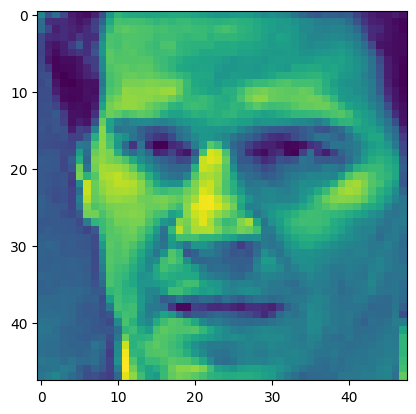

In [ ]:
plt.imshow(X[0])


In [ ]:
X

[array([[0.41176471, 0.22352941, 0.3254902 , ..., 0.04705882, 0.06666667,
         0.03921569],
        [0.31764706, 0.12156863, 0.11764706, ..., 0.04705882, 0.02745098,
         0.01568627],
        [0.31764706, 0.2       , 0.07843137, ..., 0.05098039, 0.03529412,
         0.01568627],
        ...,
        [0.35686275, 0.34509804, 0.34901961, ..., 0.39215686, 0.38039216,
         0.61176471],
        [0.3372549 , 0.3372549 , 0.34901961, ..., 0.40784314, 0.35294118,
         0.62745098],
        [0.35294118, 0.37647059, 0.41176471, ..., 0.40392157, 0.33333333,
         0.67843137]]),
 array([[0.57647059, 0.54117647, 0.52941176, ..., 0.03529412, 0.03137255,
         0.03529412],
        [0.52941176, 0.51372549, 0.48235294, ..., 0.03137255, 0.03137255,
         0.03137255],
        [0.34117647, 0.37647059, 0.28627451, ..., 0.03137255, 0.02745098,
         0.03137255],
        ...,
        [0.23529412, 0.24705882, 0.2627451 , ..., 0.18039216, 0.18431373,
         0.19607843],
        [0.2

In [ ]:
import pandas as pd

image_data = []

# Add the images from X to the list
for img in X:
    image_data.append(img)

# Create the DataFrame with a single column named 'image'
df_X = pd.DataFrame({'image': image_data})

image_data_Y = []
for img in Y:
    image_data_Y.append(img)
df_Y = pd.DataFrame({'image': image_data_Y})

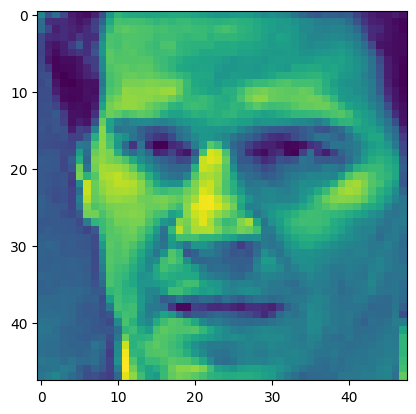

In [ ]:
plt.imshow(df_X['image'][0])

In [ ]:
df_X['label'] = train_label
df_Y['label'] = test_label

In [ ]:
print(df_X.head())
print(df_X.tail())

                                               image  label
0  [[0.4117647058823529, 0.2235294117647059, 0.32...      0
1  [[0.5764705882352941, 0.5411764705882353, 0.52...      0
2  [[0.9803921568627451, 0.9803921568627451, 0.98...      0
3  [[0.33725490196078434, 0.3215686274509804, 0.4...      0
4  [[0.4235294117647059, 0.39215686274509803, 0.4...      0
                                                   image  label
31652  [[0.8627450980392157, 0.7568627450980392, 0.81...      6
31653  [[0.047058823529411764, 0.050980392156862744, ...      6
31654  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9960784...      6
31655  [[0.9568627450980393, 0.7725490196078432, 0.49...      6
31656  [[0.6745098039215687, 0.6313725490196078, 0.29...      6


In [ ]:
print(df_Y.head())
print(df_Y.tail())

                                               image  label
0  [[0.28627450980392155, 0.3215686274509804, 0.3...      0
1  [[0.6784313725490196, 0.6627450980392157, 0.71...      0
2  [[0.5607843137254902, 0.49411764705882355, 0.7...      0
3  [[0.4235294117647059, 0.5333333333333333, 0.85...      0
4  [[0.047058823529411764, 0.0392156862745098, 0....      0
                                                  image  label
7173  [[0.050980392156862744, 0.10980392156862745, 0...      6
7174  [[0.996078431372549, 0.9686274509803922, 0.815...      6
7175  [[0.47058823529411764, 0.5215686274509804, 0.5...      6
7176  [[0.9607843137254902, 0.9803921568627451, 0.48...      6
7177  [[0.9921568627450981, 0.7843137254901961, 0.36...      6
